In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import glob
from IPython.display import display
%matplotlib notebook

In [42]:
# Concatenate all the .csv Files 
path = os.getcwd()
files = glob.glob(path + "/*.csv")

lst = []

for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    lst.append(df)

dfs = pd.concat(lst, axis=0, ignore_index=True)

dfs.replace({'verloren':'lose', 'gewonnen':'win'}, inplace = True)
# dfs['points_diff'] = dfs.score.apply(score_diff)

print(dfs.player1_name.unique())
display(dfs.head())

['Sachenko' 'Schwaibiger' 'Shelekhova' 'Solakov' 'Wolter' 'Wächter']


,date_of_match,player1_id,player1_name,player2_id,player2_name,match_outcome,score,lk1,lk2
0,13.09.2020,20801184,Sachenko,20750311,Gesty,win,6:0 6:1,13.1,17.1
1,06.09.2020,20801184,Sachenko,20554120,Kargol,win,6:1 6:0,13.1,16.1
2,06.09.2020,20801184,Sachenko,20803715,Betz,win,6:4 6:4,13.1,14.9
3,06.09.2020,20801184,Sachenko,20802760,Faal,win,7:6 3:6 10:8,13.1,14.8
4,30.08.2020,20801184,Sachenko,20652016,Kolks,win,6:0 6:1,13.1,13.1


<IPython.core.display.Javascript object>


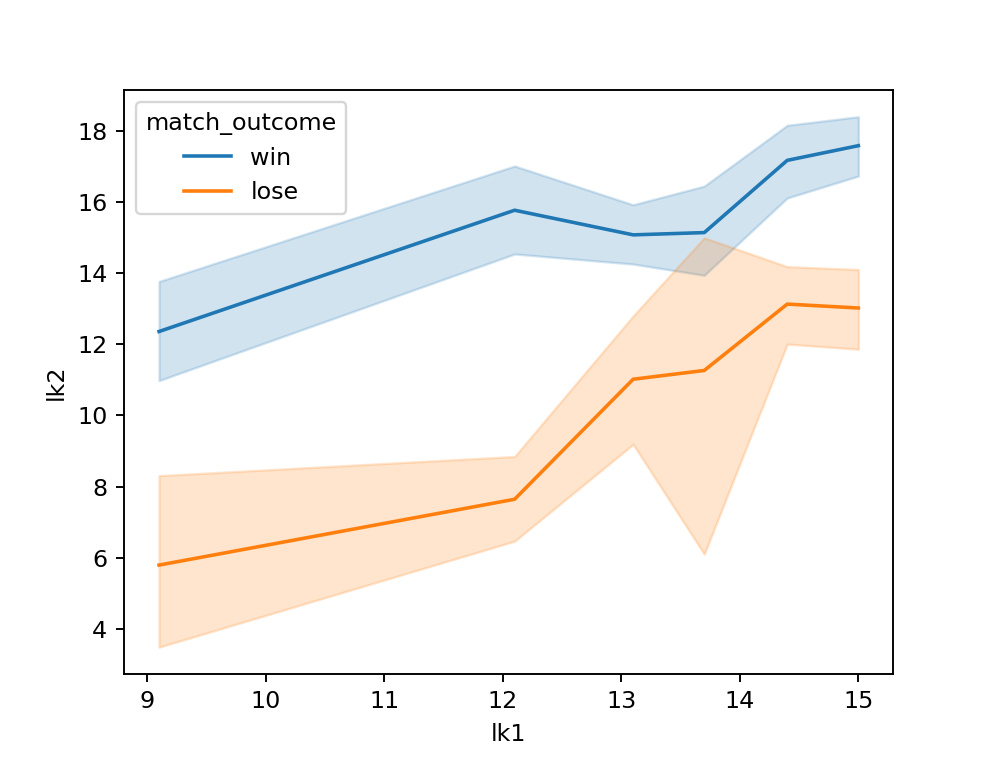

In [100]:
sns.lineplot(x = 'lk1', y = 'lk2', data = dfs, hue = 'match_outcome')
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
import numpy as np

In [14]:
# Data 
cols = ['lk1', 'lk2']

X = dfs[cols]
y = dfs['match_outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [225]:
# path = os.getcwd()
# files = glob.glob(path + "/predict/*.csv")

# for file in files:
#     predict = pd.read_csv(file)
    
#     predict_X = predict[['lk1', 'lk2']]
    
#     predict['Ridge - L2'] = ridge.predict(predict_X)
#     predict['SVC'] = svc.predict(predict_X)
#     predict['KNN'] = knn.predict(predict_X)
#     predict['LogReg'] = logreg.predict(predict_X)
#     predict['DecisionTree'] = tree.predict(predict_X)
    
#     ser = predict.loc[:, 'Ridge - L2': 'DecisionTree'].apply(lambda x: x.value_counts().idxmax(), axis=1)
#     predict.insert(7, 'final_outcome',ser)
    
#     fname = 'predict'+file.split("\\")[-1]
#     floc = path + "\predict"
    
#     predict.to_csv(fname)

In [210]:
# Predict Data
predict = pd.read_csv(r'C://Users/shakhansho.sabzaliev/Desktop/S2/DM_ML/tennis_training/predict/FischerTara.csv')

predict_X = predict[['lk1', 'lk2']]

predict['Ridge - L2'] = ridge.predict(predict_X)
predict['SVC'] = svc.predict(predict_X)
predict['KNN'] = knn.predict(predict_X)
predict['LogReg'] = logreg.predict(predict_X)
predict['DecisionTree'] = tree.predict(predict_X)

ser = predict.loc[:, 'Ridge - L2': 'DecisionTree'].apply(lambda x: x.value_counts().idxmax(), axis=1)
predict.insert(7, 'final_outcome',ser)

display(predict)

,date_of_match,player1_id,player1_name,player2_id,player2_name,lk1,lk2,final_outcome,Ridge - L2,SVC,KNN,LogReg,DecisionTree
0,27.09.2020,20754594,Fischer,29753705,Pfau,15.1,15.1,lose,win,lose,lose,win,lose
1,27.09.2020,20754594,Fischer,20355195,Kösters,15.1,20.1,win,win,win,win,win,win
2,13.09.2020,20754594,Fischer,28803686,Opalka,15.1,22.1,win,win,win,win,win,win
3,05.09.2020,20754594,Fischer,20457747,Goedecke,15.1,15.1,lose,win,lose,lose,win,lose
4,23.08.2020,20754594,Fischer,20357314,van Raay,15.1,23.1,win,win,win,win,win,win
5,16.08.2020,20754594,Fischer,20263300,Verheyen,15.1,23.1,win,win,win,win,win,win
6,09.08.2020,20754594,Fischer,29050113,Siebert,15.1,22.1,win,win,win,win,win,win
7,12.07.2020,20754594,Fischer,20651971,Menze,15.1,11.7,lose,lose,lose,lose,lose,win
8,09.07.2020,20754594,Fischer,20551904,Bodem,15.1,15.1,lose,win,lose,lose,win,lose
9,09.07.2020,20754594,Fischer,20653485,Rajapreyar,15.1,8.0,lose,lose,lose,lose,lose,lose


In [63]:
# Ridge Classifier - L2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=19)

ridge = RidgeClassifier(alpha = 0.5)

ridge_cv = cross_val_score(ridge, X, y, cv = 5)
print(ridge_cv)

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

[0.73333333 0.78333333 0.78333333 0.73333333 0.81355932]


0.7333333333333333

In [233]:
# SVC - Hyperparameter Tuning 

parameters = {'C':[1, 10, 100]}

svc = SVC()
cv = GridSearchCV(svc, parameters, cv = 5)

cv.fit(X, y)

print(cv.best_params_)

{'C': 10}


In [49]:
svc = SVC(C = 10)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

svc.score(X_test, y_test)

0.8111111111111111

In [36]:
# KNN - Neighrest Neighbor 
param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=3)
knn_cv.fit(X,y)
print(knn_cv.best_params_)

{'n_neighbors': 18}


In [59]:
knn = KNeighborsClassifier(n_neighbors=18)

knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.7888888888888889


In [253]:
# Logistic Regression Classifier
logreg = LogisticRegression()

parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

cv = GridSearchCV(logreg, parameters, cv=5)
cv.fit(X_train, y_train)

print(cv.best_params_)

{'C': 0.01}


In [64]:
logreg = LogisticRegression(C = 0.01)

logreg.fit(X_train, y_train)

# y_pred = logreg.predict(X_test)
# print(classification_report(y_test, y_pred))
logreg.score(X_test, y_test)

0.7555555555555555

In [66]:
# Decision Tree
from numpy.random import randint

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

tree.score(X_test, y_test)

0.8222222222222222